# Борис Свиридов лаба №2

### Тут функции из презы.

In [180]:
import numpy as np
from pkg_resources import non_empty_lines
from sklearn.preprocessing import MinMaxScaler


def linear(x):
    return x

def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def arctan(x):
    return np.arctan(x)

### Тут модель перцептрона(из одного нейрона), чтобы с кайфом акт. ф-ии тестить.

In [181]:
class Perceptron:
    def __init__(self, activation_function, lr = 0.1, epochs = 1000):
        self.activation = activation_function
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.rand(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(n_samples):
                y_pred = self.activation(np.dot(X[i], self.weights) + self.bias)

                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, X):
        return self.activation(np.dot(X, self.weights) + self.bias)

### Здесь я датасеты делаю с разным разбросом(я их потом ещё скалирую от 0 до 1):
* Стандартная бинарная классификация.
* Сгустки Гаусовы
* Полумесяцы
* Кольца
* XOR

In [187]:
import numpy as np
from sklearn.datasets import make_classification, make_circles, make_moons, make_blobs
import matplotlib.pyplot as plt

SEED = 223

datasets = []

datasets.append((make_classification(n_samples=100, n_features=2, random_state=SEED, n_redundant=0, n_informative=2), "классический"))
datasets.append((make_blobs(n_samples=100, centers=2, random_state=SEED), "Гаусовы сгустки"))
datasets.append((make_moons(n_samples=100, noise=0.1, random_state=SEED), "Полумеяцы"))
datasets.append((make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=SEED), "Кольца"))
datasets.append(((np.array([[0, 0], [0, 1], [1, 0], [1, 1]] * 25), np.array([0, 1, 1, 0] * 25)), "XOR"))

### Здесь для каждого сета и акт. ф-ии модель учим и строим графики.

-0.97144047542004 
 1.70949786124916
0 
 1
2.4849439295015842e-05 
 0.999849134199422
-0.9263080067322792 
 0.9894364137449995
-0.9608403578447456 
 1.169174218048561
-1.0444176558044034 
 2.054909765967183
0 
 1
6.364017854024079e-16 
 0.9999999999999742
-0.9476624029024451 
 0.9975279158066797
-0.9990393315845432 
 1.2413455779819706
-0.5981529066970104 
 1.6434554565356552
0 
 1
0.0001734626315962028 
 0.9997564006186721
-0.7769733574548338 
 0.9883947484686731
-0.7297540483146571 
 1.1555717917845718
0.387780151850627 
 0.5353631547331317
0 
 1
0.4399466584232354 
 0.47589463933950876
0.39464186305335286 
 0.5080307190330599
0.39391737738033455 
 0.5091310321713556
0.35888888888888926 
 0.5888888888888884
0 
 1
0.46748204381606145 
 0.5205012048149513
0.391430841305252 
 0.5630184431446243
0.38905602245239645 
 0.5651903408291025


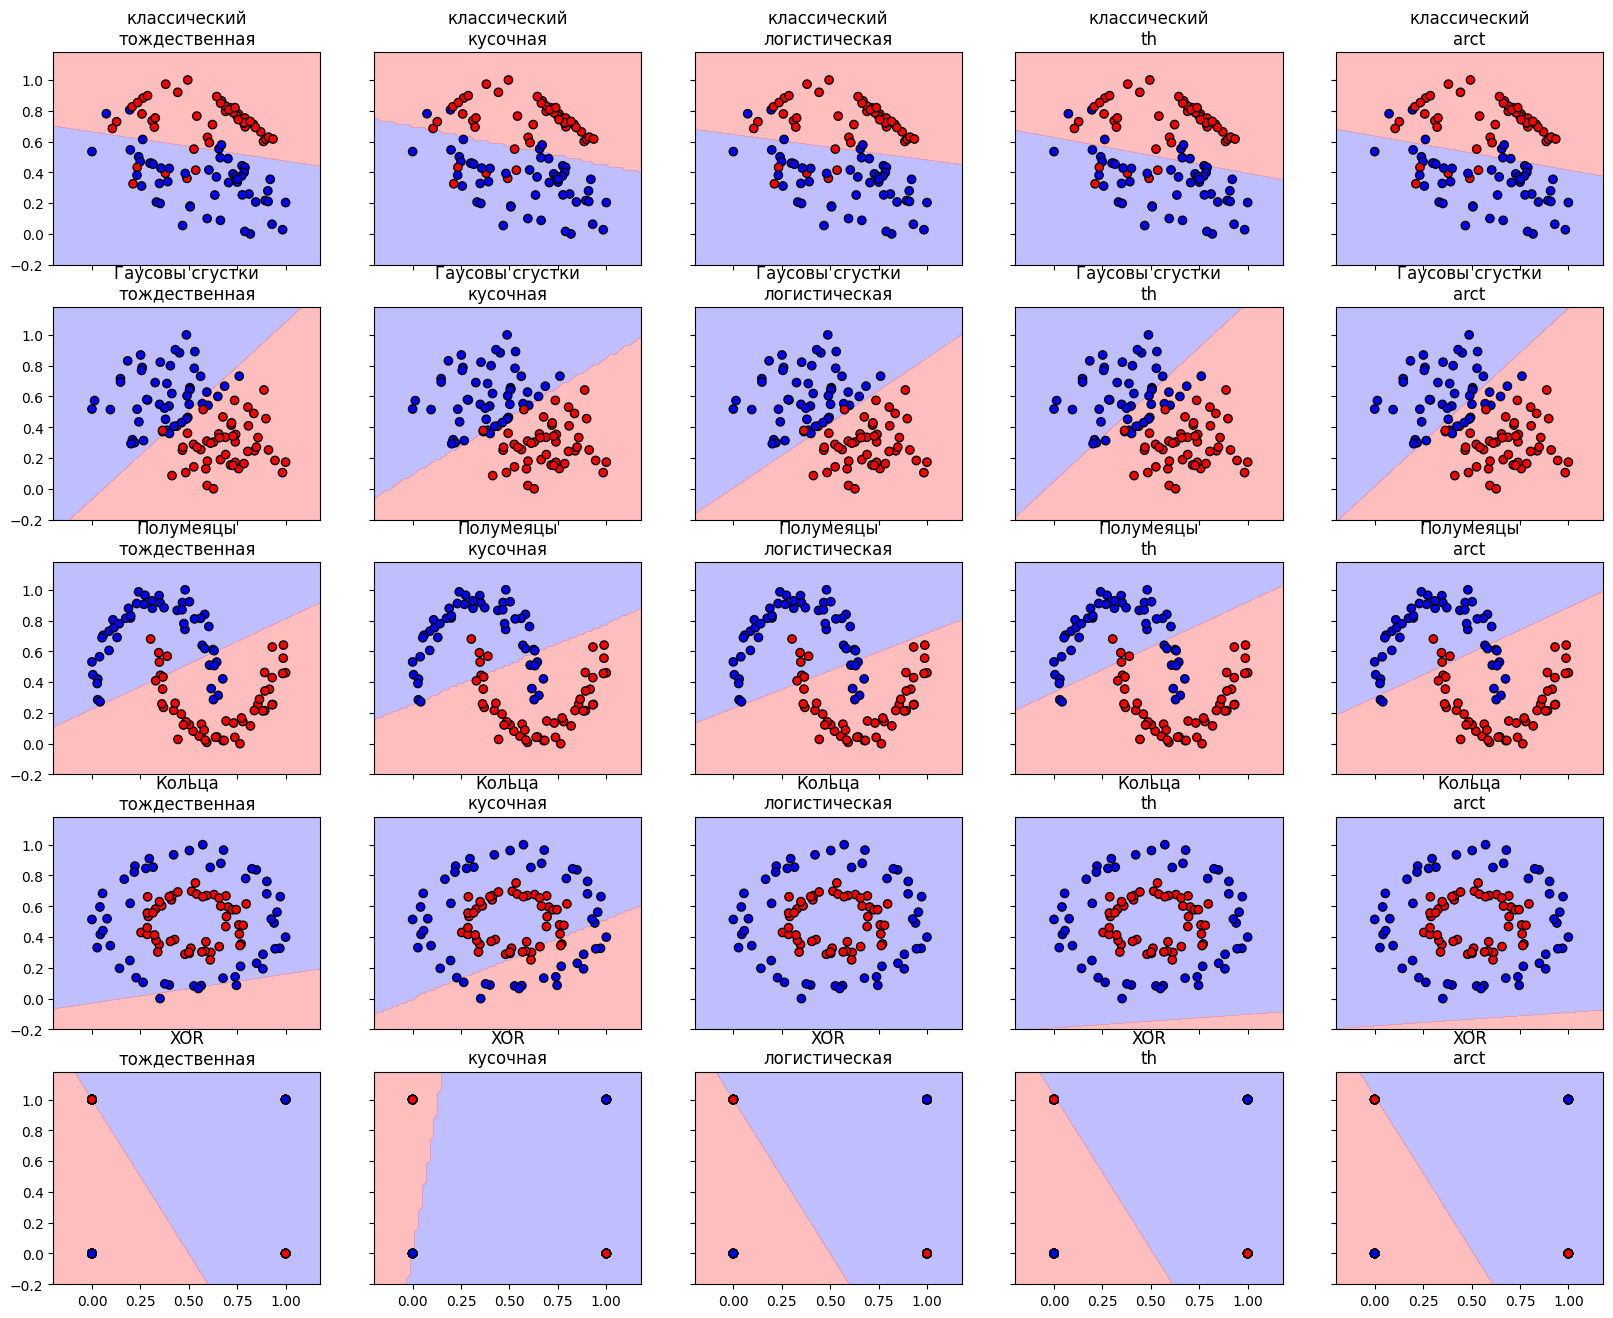

In [209]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

funcs = [(linear, "тождественная"),
         (step, "кусочная"),
         (sigmoid, "логистическая"),
         (tanh, "th"),
         (arctan, "arct")]

fig, axes = plt.subplots(len(datasets), len(funcs), figsize=(20, 16), sharex='col', sharey='row')

scaler = MinMaxScaler(feature_range=(0, 1))

for i, ((X, y), name) in enumerate(datasets):
    X = scaler.fit_transform(X)
    for j, (func, f_name) in enumerate(funcs):
        ax = axes[i, j]

        model = Perceptron(activation_function=func, lr = 0.1, epochs = 1000)
        model.fit(X, y)

        h = 0.02
        xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, h),
                             np.arange(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        print(Z.min(), "\n", Z.max())
        ax.contourf(xx, yy, Z, levels=[-100, 0.5, 100], cmap='bwr', alpha=0.5)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
        ax.set_title(f"{name}\n{f_name}", fontsize=12)

Что можно сказать.
1. Хорошо видно почему XOR нерешаема(просто невозможно такую линию провести чтобы с каждой из сторон по две точки одного цвета были).
2. Более менее с задачей классификации справились все функции, но тангенсоида и арктангенсоида дают завышенные ожидание для одного из классов.
3. Для колец и полумесяцев также как и для XOR ничего не решают, так как задачи нелинейные.

# Вопросы

1. Функция активации - функция отвечающая за мощность выходного сигнала нейрона.
2. Нейрон - один. Перцептрон - слой нейронов(может из одного, может из многих).
3. w = w + η * (y_true - y_pred) * x
4. Задача XOR - нелинейная, поэтому перцептрон не может.
5. Пропадёт градиент, и переход между классами станет резким.(минус - нельзя прикинуть вероятности).